In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, desc

# Start Spark session
spark = SparkSession.builder.appName("Retail Data Visualization").getOrCreate()

# Load dataset
df = spark.read.csv("/content/new_retail_data.csv", header=True, inferSchema=True)

# Clean important fields
df_clean = df.na.drop(subset=["Transaction_ID", "Amount", "Country", "Gender", "Product_Category", "Ratings"])
df_clean = df_clean.withColumn("Amount", col("Amount").cast("double"))
df_clean = df_clean.withColumn("Ratings", col("Ratings").cast("double"))


<ipython-input-19-1fb579ca39cf>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pdf1.head(10), x="Country", y="Total_Revenue", palette="viridis")


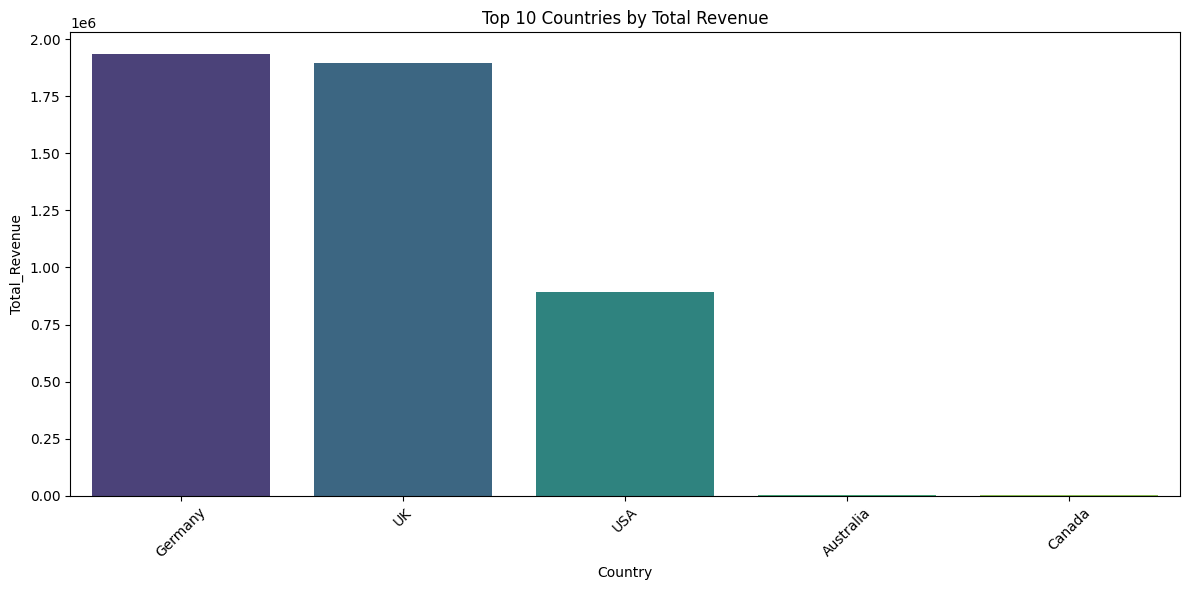

In [ ]:
revenue_by_country = df_clean.groupBy("Country") \
    .agg(sum("Amount").alias("Total_Revenue")) \
    .orderBy(desc("Total_Revenue"))

# Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pdf1 = revenue_by_country.toPandas()
plt.figure(figsize=(12,6))
sns.barplot(data=pdf1.head(10), x="Country", y="Total_Revenue", palette="viridis")
plt.title("Top 10 Countries by Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-20-edb029049b8c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pdf2.head(10), x="Product_Category", y="Category_Sales", palette="magma")


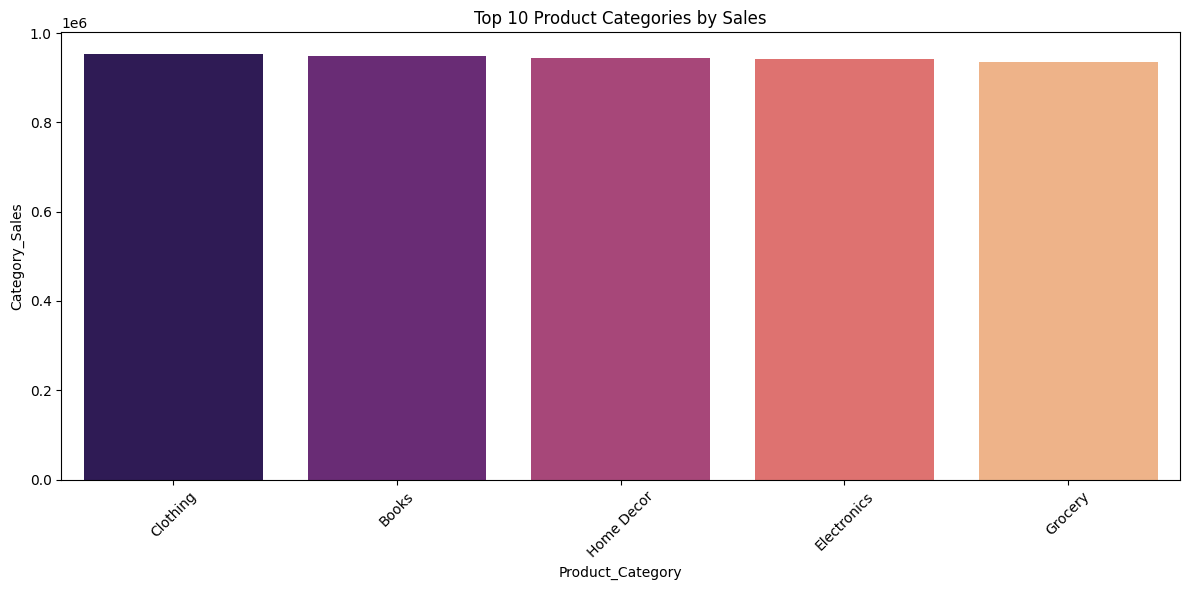

In [ ]:
category_sales = df_clean.groupBy("Product_Category") \
    .agg(sum("Amount").alias("Category_Sales")) \
    .orderBy(desc("Category_Sales"))

pdf2 = category_sales.toPandas()
plt.figure(figsize=(12,6))
sns.barplot(data=pdf2.head(10), x="Product_Category", y="Category_Sales", palette="magma")
plt.title("Top 10 Product Categories by Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-21-ba0a07ec60b9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pdf3, x="Customer_Segment", y="Avg_Spend", palette="coolwarm")


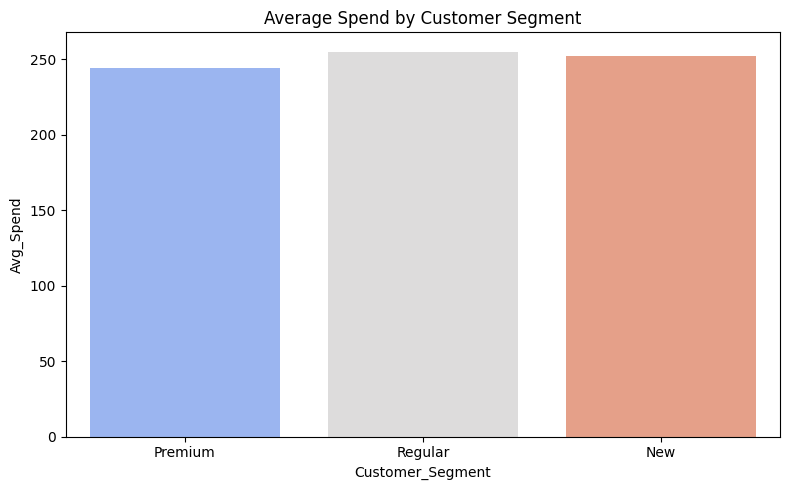

In [ ]:
segment_avg = df_clean.groupBy("Customer_Segment") \
    .agg({"Amount": "avg"}) \
    .withColumnRenamed("avg(Amount)", "Avg_Spend")

pdf3 = segment_avg.toPandas()
plt.figure(figsize=(8,5))
sns.barplot(data=pdf3, x="Customer_Segment", y="Avg_Spend", palette="coolwarm")
plt.title("Average Spend by Customer Segment")
plt.tight_layout()
plt.show()


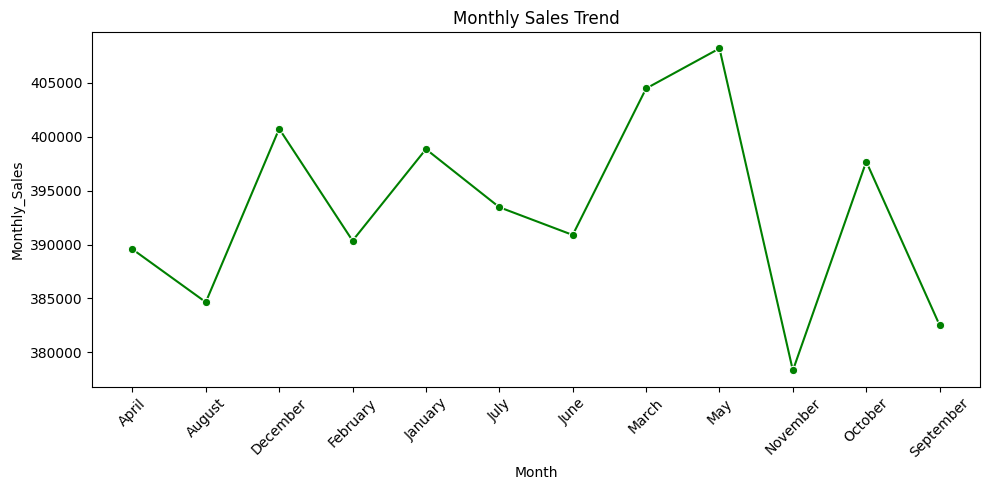

In [ ]:
monthly_sales = df_clean.groupBy("Month") \
    .agg(sum("Amount").alias("Monthly_Sales")) \
    .orderBy("Month")

pdf4 = monthly_sales.toPandas()
plt.figure(figsize=(10,5))
sns.lineplot(data=pdf4, x="Month", y="Monthly_Sales", marker='o', color="green")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-23-695ef1b0aeb4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pdf5, x="Gender", y="Avg_Spend", palette="pastel")


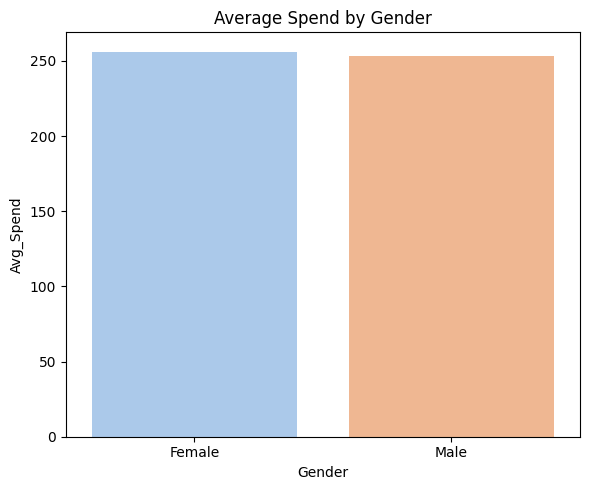

In [ ]:
gender_avg = df_clean.groupBy("Gender") \
    .agg({"Amount": "avg"}) \
    .withColumnRenamed("avg(Amount)", "Avg_Spend")

pdf5 = gender_avg.toPandas()
plt.figure(figsize=(6,5))
sns.barplot(data=pdf5, x="Gender", y="Avg_Spend", palette="pastel")
plt.title("Average Spend by Gender")
plt.tight_layout()
plt.show()


<ipython-input-24-ecc08d508c90>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pdf6, x="Ratings", y="count", palette="rocket")


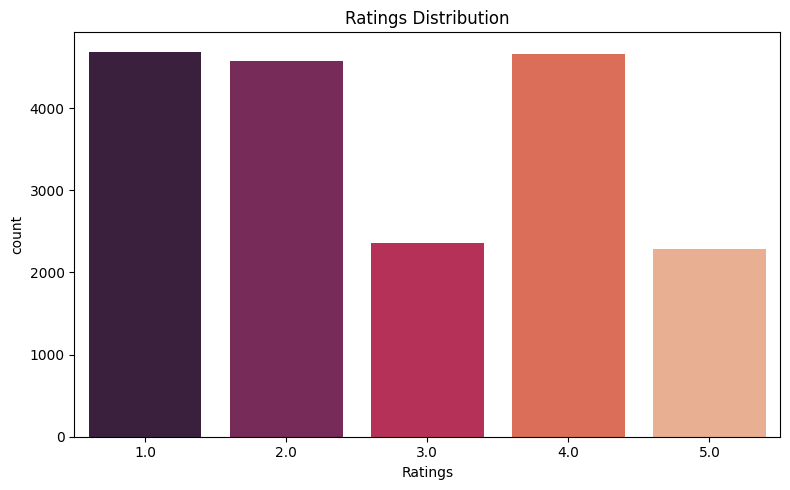

In [ ]:
ratings_dist = df_clean.groupBy("Ratings") \
    .count() \
    .orderBy("Ratings")

pdf6 = ratings_dist.toPandas()
plt.figure(figsize=(8,5))
sns.barplot(data=pdf6, x="Ratings", y="count", palette="rocket")
plt.title("Ratings Distribution")
plt.tight_layout()
plt.show()


In [ ]:
spark.stop()
